In [108]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
from random import randint

import yfinance as yf

In [109]:
file_path = '/Users/apple/Downloads/Jan_Fut_Data.csv'

In [110]:
data = pd.read_csv(file_path)

In [113]:
data = data[data['Open'] >= 0]

In [114]:
data.columns = ['Date','Open','High','Low','Close','Adj Close','Volume']

In [71]:
# stock = "RELIANCE.NS"
stock = "HDFCBANK.NS"

data = yf.download(tickers=stock, period="max", interval="1d")
        
data = pd.DataFrame(data)

data.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [115]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,03/01/2022 09:16:00,36621.00,36621.00,35708.05,35811.85,35811.85,82600.0
1,03/01/2022 09:17:00,35813.95,35825.75,35798.70,35798.70,35798.70,38900.0
2,03/01/2022 09:18:00,35796.55,35796.90,35757.40,35782.60,35782.60,28775.0
3,03/01/2022 09:19:00,35782.60,35834.25,35782.60,35834.25,35834.25,28900.0
4,03/01/2022 09:20:00,35830.50,35839.65,35823.40,35835.00,35835.00,28275.0
...,...,...,...,...,...,...,...
5620,21/01/2022 15:26:00,37672.90,37686.05,37664.50,37686.05,37686.05,17075.0
5621,21/01/2022 15:27:00,37684.40,37713.65,37680.00,37713.65,37713.65,20125.0
5622,21/01/2022 15:28:00,37713.10,37749.00,37713.10,37749.00,37749.00,29400.0
5623,21/01/2022 15:29:00,37749.80,37757.70,37730.05,37740.00,37740.00,38425.0


In [116]:
data['Date'] = pd.to_datetime(data['Date'])
cut_off_date = '2010-01-01' 
data = data[data['Date'] >= cut_off_date]


data.head()

/var/folders/gp/x0f5sgq13db073j79l3_2tb40000gn/T/ipykernel_22883/3980452152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-01 09:16:00,36621.00,36621.00,35708.05,35811.85,35811.85,82600.0
1,2022-03-01 09:17:00,35813.95,35825.75,35798.70,35798.70,35798.70,38900.0
2,2022-03-01 09:18:00,35796.55,35796.90,35757.40,35782.60,35782.60,28775.0
3,2022-03-01 09:19:00,35782.60,35834.25,35782.60,35834.25,35834.25,28900.0
4,2022-03-01 09:20:00,35830.50,35839.65,35823.40,35835.00,35835.00,28275.0


In [202]:
# take random sets of sequential rows 
new_set = []
# for row_set in range(0, 100000):
for row_set in range(0, 5000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(data)-row_quant)
    market_subset = data.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

0
2022-01-20 11:07:00
2000
2022-03-01 14:47:00
4000
2022-07-01 14:54:00


In [203]:
len(market_subset)

23

In [204]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(100020, 8)
(90020, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
273,4999,2022-03-01 14:09:00,0.000793,0.000472,0.000336,0.209125,0.000549,9550.0
274,4999,2022-03-01 14:09:00,0.000414,0.000605,0.000542,1.201258,0.000537,-7500.0
275,4999,2022-03-01 14:09:00,0.000412,0.000311,0.000537,-0.428571,0.000318,8625.0
276,4999,2022-03-01 14:09:00,-0.000520,-0.000092,-0.000107,0.862500,-0.000477,-10100.0
277,4999,2022-03-01 14:09:00,0.000681,0.000378,0.000062,-0.542282,0.000483,-3925.0
278,4999,2022-03-01 14:09:00,-0.000467,-0.000228,0.000107,-0.460411,-0.000444,9850.0
279,4999,2022-03-01 14:09:00,-0.000205,-0.000286,-0.000199,2.141304,-0.000327,375.0
280,4999,2022-03-01 14:09:00,-0.000253,-0.000137,-0.000215,0.025952,-0.000250,-10575.0
281,4999,2022-03-01 14:09:00,0.000078,-0.000275,-0.000162,-0.713322,0.000011,675.0
282,4999,2022-03-01 14:09:00,0.000457,0.000320,0.000117,0.158824,0.000421,-2925.0


In [205]:
new_set_df.head()

,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
4962,0,2022-01-20 11:07:00,0.000743,0.000348,-0.000053,0.895349,0.000743,-475.0
4963,0,2022-01-20 11:07:00,-0.000621,0.000016,0.000026,-0.116564,-0.000515,22400.0
4964,0,2022-01-20 11:07:00,-0.000844,-0.001139,-0.000894,6.222222,-0.000171,-18000.0
4965,0,2022-01-20 11:07:00,0.000433,0.000118,0.000034,-0.692308,0.000341,-650.0
4966,0,2022-01-20 11:07:00,-0.000402,0.000011,0.000097,-0.081250,-0.000246,-1975.0


In [206]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)

In [207]:
new_set_df.tail(10)

new_set_df[new_set_df['Close_Date'] == '2017-03-03']

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern


In [208]:
new_set_df['Outcome_Next_Day_Direction'].describe()

count     90020.000000
mean         16.262775
std       10229.111580
min     -104575.000000
25%       -2975.000000
50%        -200.000000
75%        2600.000000
max      138200.000000
Name: Outcome_Next_Day_Direction, dtype: float64

In [209]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 

(5000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2022-01-20 11:07:00,"{HHH, LML, LHL, HLH, LML, MLL, HHH, LLL, HMH, ..."
1,1,2022-01-21 12:43:00,"{LML, HLH, HHH, LLL, LLL, HLH, MLM, LHL, LML, ..."
2,2,2022-01-14 09:56:00,"{MMM, HLH, LHL, LML, MLM, HLH, HHH, HMH, HHH, ..."
3,3,2022-05-01 13:59:00,"{LML, HHH, HMM, HMH, LLL, MMM, MHM, MMM, MMM, ..."
4,4,2022-10-01 11:28:00,"{MLM, HMH, LML, LHL, MHM, LHL, MMM, MLM, LMM, ..."


In [210]:
compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(5000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,5000.000000,5000.000000
mean,2499.500000,25.116460
std,1443.520003,1046.501965
min,0.000000,-11988.888889
25%,1249.750000,-270.454545
50%,2499.500000,-5.178571
75%,3749.250000,275.000000
max,4999.000000,15994.444444


In [211]:
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()

(5000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2022-01-20 11:07:00,"{HHH, LML, LHL, HLH, LML, MLL, HHH, LLL, HMH, ...",-39.583333
1,1,2022-01-21 12:43:00,"{LML, HLH, HHH, LLL, LLL, HLH, MLM, LHL, LML, ...",-328.333333
2,2,2022-01-14 09:56:00,"{MMM, HLH, LHL, LML, MLM, HLH, HHH, HMH, HHH, ...",94.444444
3,3,2022-05-01 13:59:00,"{LML, HHH, HMM, HMH, LLL, MMM, MHM, MMM, MMM, ...",-51.190476
4,4,2022-10-01 11:28:00,"{MLM, HMH, LML, LHL, MHM, LHL, MMM, MLM, LMM, ...",491.666667


In [212]:
compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2022-01-20 11:07:00,"HHH,LML,LHL,HLH,LML,MLL,HHH,LLL,HMH,HMH,HMH,LM...",-39.583333
1,1,2022-01-21 12:43:00,"LML,HLH,HHH,LLL,LLL,HLH,MLM,LHL,LML,HMH,LLL,HH...",-328.333333
2,2,2022-01-14 09:56:00,"MMM,HLH,LHL,LML,MLM,HLH,HHH,HMH,HHH,HHM,LLL,LM...",94.444444
3,3,2022-05-01 13:59:00,"LML,HHH,HMM,HMH,LLL,MMM,MHM,MMM,MMM,HHH,MLM,LM...",-51.190476
4,4,2022-10-01 11:28:00,"MLM,HMH,LML,LHL,MHM,LHL,MMM,MLM,LMM,MMM,MMM,HH...",491.666667


In [213]:
compressed_set[compressed_set['Close_Date'] >= '2022-01-17']

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2022-01-20 11:07:00,"HHH,LML,LHL,HLH,LML,MLL,HHH,LLL,HMH,HMH,HMH,LM...",-39.583333
1,1,2022-01-21 12:43:00,"LML,HLH,HHH,LLL,LLL,HLH,MLM,LHL,LML,HMH,LLL,HH...",-328.333333
3,3,2022-05-01 13:59:00,"LML,HHH,HMM,HMH,LLL,MMM,MHM,MMM,MMM,HHH,MLM,LM...",-51.190476
4,4,2022-10-01 11:28:00,"MLM,HMH,LML,LHL,MHM,LHL,MMM,MLM,LMM,MMM,MMM,HH...",491.666667
5,5,2022-01-19 11:36:00,"HHH,MLM,HMH,LML,LLL,LHL,MLH,LHL,MHM,LHL,HLH,LL...",-32.407407
...,...,...,...,...
4995,4995,2022-04-01 12:47:00,"HLH,LHL,MLM,MLM,HHH,MMM,MHM,LHL,HLH,LLM,HHH,LL...",142.391304
4996,4996,2022-01-19 14:23:00,"LML,LHL,HLH,MHL,HHH,MMM,HHH,LML,MLM,LLL,HMH,MM...",-432.692308
4997,4997,2022-05-01 12:54:00,"HHH,LMM,MMM,HLM,HHH,HMH,HMH,LLM,HMH,HHH,LLL,HH...",445.192308
4998,4998,2022-11-01 13:38:00,"LLL,LHL,MLH,MHM,HHH,LLL,MHM,HHH,LLL,HMH,MLM,HM...",644.230769


In [214]:
# compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.datetime.now() 
#                                            - datetime.timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= '2022-01-17'] # Sys.Date()-90 

compressed_set_validation.shape

(4369, 4)

In [215]:
# compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.datetime.now() 
#                                            - datetime.timedelta(days=90)]  

compressed_set = compressed_set[compressed_set['Close_Date'] < '2022-01-17']  
compressed_set.shape

(631, 4)

In [216]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [217]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [218]:
compressed_set['Outcome_Next_Day_Direction'].describe()

count     631.000000
mean       -1.753076
std       779.531844
min     -7352.272727
25%      -214.826128
50%        -7.692308
75%       206.202652
max      7804.545455
Name: Outcome_Next_Day_Direction, dtype: float64

In [219]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 250])

631


290

In [220]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 259]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set)) 

all moves: 631
big moves only: 286


In [221]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
29,29,"HHH,MMM,LLL,LLL,HMH,MLM,MHM,LML,LML,LML,MHM,ML...",0
37,37,"HMH,MMM,MMM,MHL,MLM,HHH,HHH,MLM,MMM,MHM,LLL,MH...",1
68,68,"HMM,LML,MML,HMH,MLM,LLL,MMM,LHL,HLH,LHL,MMM,HL...",1
74,74,"LHL,HMH,LLL,MLM,HHH,MMM,MMM,MLM,HLH,LHL,LLL,LH...",1
81,81,"MMM,MML,MLL,MLM,LHL,MLM,MLM,MMM",0


In [222]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(142, 2)
(144, 2)


In [223]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

21

In [224]:
compressed_set['Outcome_Next_Day_Direction'].head()

29    0
37    1
68    1
74    1
81    0
Name: Outcome_Next_Day_Direction, dtype: int64

In [225]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    print(grid_Df.head(5))
    print(grid_Df.index.name)
    print(grid_Df.index)
#     del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)

In [226]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

     HHH  HHM  HLH  HLM  HMH  HMM  LHL  LHM  LLL  LLM  ...  LMM  MHH  MHL  \
x                                                      ...                  
HHH   17    5    6    8   20   13    9    0   25    0  ...    0    1    0   
HHM    0    0    1    0    4    0    0    0   15    8  ...    0    0    0   
HLH    6    0    7    0   11    0   48    0   10    0  ...    2   11    0   
HLM    0    0    0    0    0    0    2    0    5    0  ...    0    0    0   
HMH   10    0    2    0   10    4   11    0   13    0  ...    6    0    2   

     MHM  MLH  MLL  MLM  MMH  MML  MMM  
x                                       
HHH    8    0    6   55    0    0   25  
HHM    0    0    0    3    0    0    5  
HLH   16    0    0    0    2    1   39  
HLM    0    0    2    7    0    0    1  
HMH    9    0    0   35    9    1    8  

[5 rows x 21 columns]
x
Index(['HHH', 'HHM', 'HLH', 'HLM', 'HMH', 'HMM', 'LHL', 'LHM', 'LLL', 'LLM',
       'LML', 'LMM', 'MHH', 'MHL', 'MHM', 'MLH', 'MLL', 'MLM', 'MMH', '

/var/folders/gp/x0f5sgq13db073j79l3_2tb40000gn/T/ipykernel_22883/1078610889.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
/var/folders/gp/x0f5sgq13db073j79l3_2tb40000gn/T/ipykernel_22883/1078610889.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str


In [227]:
grid_neg.head()

,HHH,HHM,HLH,HLM,HMH,HMM,LHL,LHM,LLL,LLM,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.078125,0.400000,0.039326,0.090909,0.116959,0.000000,0.000000,0.000000,0.176471,0.00,...,0.000000,0.00,0.0,0.015306,0.352941,0.00,0.073077,0.000000,0.000000,0.052863
HHM,0.015625,0.000000,0.016854,0.000000,0.005848,0.000000,0.000000,0.000000,0.016043,0.04,...,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.061538,0.000000,0.000000,0.017621
HLH,0.125000,0.033333,0.000000,0.000000,0.111111,0.000000,0.062827,0.000000,0.144385,0.00,...,0.051282,0.08,0.7,0.096939,0.000000,0.04,0.076923,0.131579,0.057143,0.114537
HLM,0.000000,0.000000,0.011236,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.00,...,0.051282,0.00,0.0,0.000000,0.000000,0.28,0.011538,0.000000,0.000000,0.000000
HMH,0.062500,0.000000,0.073034,0.000000,0.052632,0.041667,0.031414,0.157895,0.090909,0.00,...,0.282051,0.00,0.1,0.066327,0.117647,0.00,0.073077,0.236842,0.000000,0.123348


In [228]:
grid_pos.head()

,HHH,HHM,HLH,HLM,HMH,HMM,LHL,LHM,LLL,LLM,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.081731,0.138889,0.038462,0.444444,0.156250,0.361111,0.031690,0.0,0.137363,0.000000,...,0.00,0.021739,0.000000,0.035874,0.0,0.214286,0.176849,0.000000,0.000000,0.083056
HHM,0.000000,0.000000,0.006410,0.000000,0.031250,0.000000,0.000000,0.0,0.082418,0.533333,...,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.009646,0.000000,0.000000,0.016611
HLH,0.028846,0.000000,0.044872,0.000000,0.085938,0.000000,0.169014,0.0,0.054945,0.000000,...,0.05,0.239130,0.000000,0.071749,0.0,0.000000,0.000000,0.057143,0.055556,0.129568
HLM,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007042,0.0,0.027473,0.000000,...,0.00,0.000000,0.000000,0.000000,0.0,0.071429,0.022508,0.000000,0.000000,0.003322
HMH,0.048077,0.000000,0.012821,0.000000,0.078125,0.111111,0.038732,0.0,0.071429,0.000000,...,0.15,0.000000,0.111111,0.040359,0.0,0.000000,0.112540,0.257143,0.055556,0.026578


In [229]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

outcome: 0
0.8929149149350439
3.913793849544383
outcome: 0
0.8283859051116965
-3.012979536823794
outcome: 0
1.2105437556248417
3.5239177281981524
outcome: 1
0.9360759675099102
-23.37989017941479
outcome: 0
0.830907883842918
-19.402949503834975
outcome: 1
1.9615020435061552
10.926647148566115
outcome: 0
0.8955929740136188
-9.911166099345657
outcome: 0
1.3322374253711473
11.739229016536797
outcome: 1
0.8652016129317827
-8.481845212281623
outcome: 1
1.3207897717057766
-2.343147041036076
outcome: 0
1.1199770573967844
-1.3348445800948698
outcome: 1
1.2590201869704005
-4.707668795912348
outcome: 0
0.834219212119772
-3.039376921136217
outcome: 1
0.899768135577345
-5.257763099716356
outcome: 0
0.8368789996015219
-4.558062569608252
outcome: 1
1.138863693680952
4.516248137462547
outcome: 1
1.0513924998579272
9.651472479855354
outcome: 0
0.9529103594856129
0.011327288195922547
outcome: 1
1.4742642145615723
5.491556350753837
outcome: 1
1.2886736001145538
-0.5982563118978215
outcome: 0
1.0236406501

outcome: 0
1.0740441821896063
-0.7512884074279819
outcome: 1
1.1042860156525747
-5.755313627870878
outcome: 1
1.0741131223054419
-4.2523578139719165
outcome: 1
1.0924977640151985
5.623932475805694
outcome: 1
0.8671875561012319
7.66359826294459
outcome: 1
0.9689982195388537
7.584501926202011
outcome: 1
1.3991811331595108
2.973617243514184
outcome: 1
1.305603028613624
7.839974640035959
outcome: 0
3.1036270091418454
4.640514297892247
outcome: 1
1.6709087097769322
9.733911078290042
outcome: 0
1.5939646037573296
26.029212912138007
outcome: 0
1.6288689968276022
5.235934892100833
outcome: 0
0.9686924485873082
-1.8172836003028336
outcome: 1
0.7830700404127048
-21.41141539720034
outcome: 1
1.0385351202151425
-8.380999303305321
outcome: 1
0.8333967156705764
-8.773566957847958
outcome: 0
0.719676039367127
-15.655748327955585
outcome: 0
1.0924539416594456
7.294585414330028
outcome: 1
1.1228889369367927
-0.7324401621059878
outcome: 0
0.9229739448669697
-18.90984187016627
outcome: 0
1.04975253904040

outcome: 1
0.9887987459757315
0.2505389437325587
outcome: 0
0.9582098515721992
-1.3192654495813165
outcome: 1
1.1817509804754605
-10.343971655306762
outcome: 1
0.8582592827404582
-7.863988503047955
outcome: 1
1.2109949055989266
4.377628150647861
outcome: 0
0.9595997130333684
-16.26254506352402
outcome: 1
1.4316325226429238
-6.152952434999272
outcome: 0
1.1341803181784063
5.183859359687494
outcome: 1
1.657632253254882
17.96323505675507
outcome: 1
1.1798055578875215
4.124358777204154
outcome: 1
0.9930765510752445
-0.6768055578181129
outcome: 0
1.0503778532542045
-6.055751796662668
outcome: 1
0.9249658281080001
-8.839890673493752
outcome: 0
0.8640791271394983
-6.5173625851469295
outcome: 0
0.9691109388949409
-10.314864883682935
outcome: 0
0.8944269495017482
-17.598087030663105
outcome: 0
0.9683787379426163
-3.3247250536300466
outcome: 1
0.9564946467725138
7.23326773813335
outcome: 0
0.8193906488769944
-4.1584673764724736
outcome: 1
1.0639412269530417
-14.804825564256664
outcome: 1
1.20554

outcome: 1
1.2416740789734662
12.995148175997873
outcome: 0
1.1641602667423578
4.64180041827634
outcome: 1
1.2740713514114759
4.155241029326009
outcome: 1
0.9220937001004602
-1.3919991110127432
outcome: 1
1.8160051623207554
3.6140917199623983
outcome: 0
0.9003383300442969
24.223508455564218
outcome: 1
1.1784756405217256
-27.512615169046544
outcome: 0
0.9104180344673419
-7.574300705642147
outcome: 0
1.338606797748497
1.3720727840355702
outcome: 1
0.7817993174532758
-9.166716814395322
outcome: 1
0.8014576583859763
-9.549693952961427
outcome: 1
1.127051184716313
16.387180077826606
outcome: 1
1.085835479283081
0.2222616199905558
outcome: 0
1.2764426763704217
11.895395893929365
outcome: 0
1.0338625427630983
-7.995424921771799
outcome: 0
1.1427641770687595
7.949800887745279
outcome: 1
0.8658145769237718
3.4483125557657326
outcome: 0
1.0907922377435586
14.408783559597543
outcome: 0
0.7508307404321064
-4.595408901895964
outcome: 1
0.644844447123007
-21.665256467470343
outcome: 1
1.660206342824

outcome: 0
1.0075815508550947
1.3723083534313703
outcome: 1
1.3192328099732513
4.574464269586315
outcome: 0
0.681855607033616
-17.949746469572723
outcome: 1
0.7782303998511785
-6.92610090439186
outcome: 1
1.135433147242277
5.51059545234299
outcome: 1
1.2776246470620005
14.994278514010407
outcome: 0
1.475319951465333
2.867737687589088
outcome: 0
1.076995825816596
3.138215495443431
outcome: 0
1.1731237736273659
10.223656784299374
outcome: 1
0.9717801441837158
1.7984323621036669
outcome: 1
0.7363057100497807
-2.0255697423516588
outcome: 1
1.1475558563321362
-3.366275081514271
outcome: 1
1.095688323536073
1.2264193723307095
outcome: 0
0.9213655461043561
-7.361945874830237
outcome: 1
1.203377523331558
10.051402248098537
outcome: 1
1.2752143737896213
-0.4656293919959005
outcome: 0
0.8383299118412344
-16.092378624585834
outcome: 0
1.177019284386258
0.9963849687743234
outcome: 1
0.8839127312168065
-1.650407025980452
outcome: 0
0.9199556163748124
-1.4117802492534106
outcome: 1
1.337021105761115

outcome: 0
0.9990430100063128
-12.688600707356864
outcome: 0
1.1379993535824169
1.3936899012232948
outcome: 0
1.0158386429276487
-1.9552506332065038
outcome: 1
1.0392956787600307
1.3524261058238072
outcome: 1
0.8246244612962988
-0.6835210479472765
outcome: 0
0.8316869593013219
-15.655342044570286
outcome: 1
0.8581444438729299
-8.00422953258548
outcome: 1
1.1383833116357298
-0.7301449010624623
outcome: 1
1.90915943237525
9.574116951492217
outcome: 0
0.8257785278655866
-11.504046401070347
outcome: 1
0.7954957323751751
-8.092844577452798
outcome: 1
1.4101474039168778
3.0021068141949527
outcome: 0
0.9025239170707172
-3.6730855041912354
outcome: 1
0.9493447200596155
-0.1704514210387713
outcome: 1
0.6507026856046022
-21.246643730267504
outcome: 0
1.8147429084760773
-0.4399132955181686
outcome: 0
1.2372693507779642
-4.829636106962239
outcome: 0
1.1599083687956593
-5.616865722096659
outcome: 1
1.4849997979461464
1.1986628978119822
outcome: 1
1.1200557371955575
2.2024020841446057
outcome: 1
1.5

outcome: 1
1.0040395765770989
-12.356686720588257
outcome: 0
0.43839950614862794
-20.085364494812293
outcome: 1
0.6280209429984928
-9.004397720581771
outcome: 1
0.9969764113914633
2.025515398078035
outcome: 1
1.034031797307912
5.694342405201697
outcome: 1
1.1690677913608492
2.7987081618412715
outcome: 1
1.6668733204224162
7.406718893201832
outcome: 1
1.5690900181240217
2.9575568118095665
outcome: 1
1.1060208615343625
1.6399531944348977
outcome: 0
0.9198750129129447
-2.7052540297217726
outcome: 0
1.0051293882071726
-9.635986530590042
outcome: 0
0.7586493437392506
-40.257523767665376
outcome: 0
0.7700604251455513
-11.138093293749053
outcome: 0
1.2083079045078922
9.416324633606257
outcome: 1
0.7497363299020776
-3.280908329895984
outcome: 0
0.9975291372346873
0.1986261161190676
outcome: 1
1.3069856491623661
9.192122880574006
outcome: 1
1.4402300477683834
10.37339070142466
outcome: 0
0.7831884181106638
-0.6865749834384565
outcome: 1
1.1130360095975353
10.302681728838495
outcome: 1
1.3551076

outcome: 0
0.8889713223141815
-11.252020699593606
outcome: 1
0.9224615962394044
3.50085997687372
outcome: 1
1.432157148760375
6.530346999862113
outcome: 1
1.0364460718526147
1.0314582441020994
outcome: 0
0.6120049537828773
-24.154543772818094
outcome: 0
1.0087845718844592
7.448595145613389
outcome: 1
1.2598528466890928
-4.573480164797864
outcome: 0
0.9586606430804971
-7.042232355454898
outcome: 1
1.5812890156206385
2.6902476203511863
outcome: 1
1.0899346268950634
1.2746983860757737
outcome: 1
0.7743719732050958
3.348975511892034
outcome: 0
1.1764516827732536
2.0682835125971057
outcome: 0
0.861659352630448
-12.079381876784772
outcome: 0
0.8023490179682043
-1.9508794263237852
outcome: 1
1.2136707083530744
2.933195732051
outcome: 1
0.9930514916931927
-3.4590285508591436
outcome: 1
1.3951294074543898
10.683123876328093
outcome: 0
1.6188039700004928
5.651279784457454
outcome: 1
0.6430327906084427
-8.791501583565626
outcome: 1
0.7471301906397214
-13.990942647927877
outcome: 0
1.1219789611287

outcome: 1
1.2087685285652692
9.144556268989785
outcome: 0
1.164482806030868
6.150554795871951
outcome: 1
1.031689502033149
-0.7699906582154312
outcome: 0
1.3907535269750269
12.27780227625321
outcome: 0
0.924823597362311
-7.115951438686479
outcome: 1
0.9221760658442244
6.195495486116502
outcome: 0
0.8543052043855769
1.2615306515599427
outcome: 1
1.0033626742001636
0.421305574700993
outcome: 0
1.1892417597539262
0.5814709129251397
outcome: 1
0.9119534627090037
-2.746355187638297
outcome: 1
1.9547688229708435
3.447119912469221
outcome: 0
0.36711153907777805
-35.30466492180524
outcome: 1
0.8680351571934032
1.1972537340934346
outcome: 0
0.49650527318866994
-19.81686023835373
outcome: 1
0.7100960404241502
-2.838432597138537
outcome: 0
0.9783236447357709
-11.176733957831335
outcome: 1
1.8655639135436077
12.763869844273712
outcome: 0
0.8850742508454731
0.14074478305927868
outcome: 0
1.1493064736288077
-0.5224864538163201
outcome: 1
1.5814398211725764
-9.266092274037812
outcome: 1
0.8957325277

outcome: 1
0.9105032506515831
-9.22989097290722
outcome: 0
1.1401616948959068
4.809449523266984
outcome: 0
1.2443375313012424
9.885076617215427
outcome: 1
0.9020896616425155
0.500858600106062
outcome: 1
1.1033222084853724
0.12578319643488078
outcome: 1
0.8037365857930122
-0.8222373888715152
outcome: 1
0.9839562018199499
0.6452104958027265
outcome: 0
1.0667765273125993
-3.1835336106520487
outcome: 1
2.2674109754745513
-3.767051829656187
outcome: 1
0.849597670758497
-6.375014507664369
outcome: 1
1.1575891244982761
4.769943406203449
outcome: 0
0.917834013482475
-2.193682122936894
outcome: 0
1.4482670001445896
3.8428306991696592
outcome: 0
0.9615320867771201
-4.8029261654221225
outcome: 1
1.1300018427887377
0.376313003255369
outcome: 1
1.0878194676172455
16.021710408687216
outcome: 1
1.0771429800328918
-7.180403785543662
outcome: 0
0.8116882234214321
-2.560282323945492
outcome: 1
1.2768871791288612
7.910392451490261
outcome: 0
1.5939646037573296
26.029212912138007
outcome: 0
1.341836279830

outcome: 0
1.6119879618441968
15.45884700287874
outcome: 1
0.9450573568113939
4.882087495656788
outcome: 0
1.1702078178630635
-15.992237849788246
outcome: 0
1.1897994477133174
8.60374365973432
outcome: 0
1.2203267598604142
10.45476844125717
outcome: 0
0.953113304680777
-7.244350310947439
outcome: 1
0.9162910249048145
2.7236934417828356
outcome: 0
0.9143430585502059
-0.43954904331241074
outcome: 0
2.3485484265173207
20.67550177948631
outcome: 1
0.8056833928411417
-14.54295282623578
outcome: 0
0.8410473814823132
-9.951382646378846
outcome: 1
1.0966577644464843
9.838363763517812
outcome: 1
1.0010762582770585
-0.5582543783688507
outcome: 1
1.1052460449495254
-8.83294917823319
outcome: 0
0.9486202818705852
0.24794188895341096
outcome: 1
1.3548668626556206
0.3558373648321602
outcome: 0
1.0785398655284684
-2.558472284598584
outcome: 1
0.9347109890421635
-5.246715695774274
outcome: 1
1.0247713166945656
-5.902285502580699
outcome: 1
1.202916252727721
2.444005984106631
outcome: 0
1.0512530124789

outcome: 0
1.0625224651676244
-2.8654824833200183
outcome: 1
1.3786345844855161
-17.425231563046477
outcome: 0
1.060032666357133
0.9055942944749023
outcome: 0
1.2189561727504115
7.914167024633736
outcome: 0
0.7789282286577505
-7.579565551948447
outcome: 0
1.0183078510782964
-11.042668537053608
outcome: 1
1.1754435244987236
1.6001658132515357
outcome: 0
1.6619600963903738
0.6006425631908288
outcome: 0
0.8389653013445441
-15.50422484983369
outcome: 1
0.8031256845014368
-1.1590261095459655
outcome: 0
1.0717242909654154
-2.9010728293172
outcome: 0
0.8023033679198279
-17.371780033581953
outcome: 0
1.3946388793668831
2.395826210311674
outcome: 0
0.9122097525636477
-12.69413442168138
outcome: 0
0.8030427345854836
-2.2492262515468173
outcome: 1
1.0342778331205364
-5.9671571734676565
outcome: 1
1.114924338746395
3.454382567435436
outcome: 0
0.9727157080718121
8.795925026851442
outcome: 0
0.9456658592013517
-4.624071428430738
outcome: 0
1.4502092086731728
5.610106748711818
outcome: 0
1.345075700

outcome: 1
0.9742336607042804
-0.4900644659639082
outcome: 1
0.7306375266607589
-40.91471016350289
outcome: 1
1.3072654168222828
-3.3427877027599964
outcome: 1
0.8539815773371265
7.533238297914144
outcome: 0
1.1893141571194956
-7.744468021901036
outcome: 1
1.4252453742699875
1.2039716609784084
outcome: 1
0.7422015541978678
-15.244079990286991
outcome: 0
1.0915897135656312
-1.2837049895710164
outcome: 0
0.9006240784689123
-8.493859512078409
outcome: 0
0.9094143042513226
-7.7829395531077195
outcome: 1
0.894961020246557
-9.256547253795098
outcome: 1
0.7328494236309911
-1.3370903554540767
outcome: 0
0.9274150179961193
-0.5910335889748417
outcome: 1
0.8010758745681047
-8.226389868626816
outcome: 1
0.8073633566855598
-4.3585980275931515
outcome: 0
1.2706362654249177
26.480577757277473
outcome: 1
1.3266851931046832
12.883176265283197
outcome: 1
0.910481503813392
-2.0827746896219943
outcome: 1
0.9411007697115926
0.5048102191839614
outcome: 1
0.8267792081859813
-1.7946171141112597
outcome: 1
1.

outcome: 1
1.375817332109839
-9.341270370805331
outcome: 1
1.5144263677405645
2.194475941799996
outcome: 1
1.0901383729050387
-6.380166216099515
outcome: 0
1.0292430785398075
-1.550902327546226
outcome: 0
1.0132519713167216
-6.4850993933051475
outcome: 1
1.552208607218528
-14.026845934446227
outcome: 0
0.9096412338266251
-8.63254089782269
outcome: 1
1.0406044096157767
-8.690211124797592
outcome: 0
1.0196037727205078
-2.400848810875644
outcome: 0
1.2969402131256804
10.943478890712354
outcome: 0
1.8438821481267607
18.056008330710377
outcome: 0
0.9439488682779305
-4.123981959661498
outcome: 1
1.0282095989726556
-36.830884179861535
outcome: 0
0.9536135448975829
2.549851543975353
outcome: 0
0.8408103405202985
-11.167407869403391
outcome: 1
0.955530589150161
-11.414672135153578
outcome: 0
1.0357710551999382
1.3098882407972443
outcome: 0
0.9928536339344675
-1.272122840087972
outcome: 0
0.942414695381175
0.7706870425823937
outcome: 0
1.0895759419919129
7.951620266267917
outcome: 0
0.9053958644

outcome: 0
1.1792343477566427
-3.0793212840606534
outcome: 1
1.265930356757838
2.8332386983123916
outcome: 1
1.3698932031259616
-16.75437552325466
outcome: 0
0.9266750213456573
-22.18189539783621
outcome: 1
1.495240746525287
11.22903932085371
outcome: 0
0.8206565229962863
-8.921050039730053
outcome: 1
1.1183063391285673
9.993064840518194
outcome: 0
1.0968190940616687
2.361901904436685
outcome: 1
0.9577207791434862
-3.442074256409103
outcome: 1
0.8648590265068578
1.0768930983087692
outcome: 1
0.8844662644699601
-4.641933043183177
outcome: 0
0.823123795126957
-15.190438577836005
outcome: 0
0.8521718145650913
-14.041778260247535
outcome: 0
1.0119401667779968
-11.811087079653682
outcome: 1
1.3246327964827553
20.93496077287138
outcome: 1
0.9951711255275986
-18.23058975440204
outcome: 0
0.9554927604262747
1.3228163125284988
outcome: 0
0.8334688069591465
-0.9815431536427518
outcome: 0
1.3038363108865987
11.21949736968763
outcome: 0
0.8758628815041198
-3.279675368710412
outcome: 1
1.1051574891

outcome: 1
0.6610641686566698
-13.315725127629085
outcome: 1
0.8313434946953597
-16.81801405582345
outcome: 1
1.5118998620766073
2.472470520622751
outcome: 0
2.1004268806396476
21.40365981595318
outcome: 1
1.6160334075488312
10.208757312202573
outcome: 1
1.09586688094081
-0.1951259767670081
outcome: 0
0.6366028147391558
-6.7843905319315905
outcome: 0
0.9280961824435818
0.27970409630633564
outcome: 0
0.7380744849997826
-10.567403694903042
outcome: 0
0.9592390579699936
-0.7094855031570269
outcome: 0
0.9532768565133197
-16.244554456184837
outcome: 1
1.2759789388985803
4.081586595599533
outcome: 0
1.781880022674442
-0.4951270402910937
outcome: 0
1.398902192513762
7.178381046200706
outcome: 0
1.0093165734212899
-0.6671467330030709
outcome: 0
0.884052700302061
-2.7157247243689606
outcome: 0
1.1490562113940619
1.4985416645402383
outcome: 1
1.3389521724908555
-6.973345810082208
outcome: 0
0.7921375396311101
-2.287387467835109
outcome: 0
1.3076910984014891
27.372677124541866
outcome: 1
1.119673

outcome: 1
0.9284327902003419
-11.851753289087977
outcome: 1
1.5116200523629022
-8.272002230587638
outcome: 0
0.807094328716612
6.103028471237989
outcome: 1
0.9194397193566058
-11.500481732553496
outcome: 1
0.8772929303566708
-2.1952713195957623
outcome: 0
1.5034499816681544
2.6334246682693974
outcome: 1
0.874755359857948
-14.859044992905162
outcome: 0
1.888576588319789
18.68452496050801
outcome: 1
0.9034240584892901
-3.9553753284820736
outcome: 0
0.7394436857229588
-0.6484116445111043
outcome: 1
1.204612323534909
2.8462819502533074
outcome: 1
1.3293031490936131
-3.577690227619824
outcome: 0
1.874668330345973
-1.6044689756827877
outcome: 0
1.2385889609232816
6.7493973108403535
outcome: 0
1.3667169484168273
-7.884669369827511
outcome: 1
0.823468542316241
-6.175568526062984
outcome: 1
0.9114583821882021
-2.6325959303036837
outcome: 0
1.387487729577868
3.054632066593181
outcome: 0
0.9981080231420294
-4.689993437374802
outcome: 1
1.0806908192249625
3.5266545864572323
outcome: 1
1.130484957

outcome: 1
1.2599247049811568
1.824925681180803
outcome: 0
0.6112219036650373
-36.6946991149954
outcome: 0
0.892757241599606
-7.024951431217002
outcome: 0
1.398902192513762
7.178381046200706
outcome: 0
0.8811879072095697
-1.1443314376932607
outcome: 0
1.0662754725511205
8.768726531173641
outcome: 1
0.9556976194605595
-7.122391675891944
outcome: 1
0.9143177474312676
-1.624969926681475
outcome: 1
1.1594529267875453
1.775432401219635
outcome: 1
1.2125245136057077
-5.165693498938396
outcome: 0
1.9674148621971232
2.2316479525011648
outcome: 1
1.0161972197375289
-0.1468790971202254
outcome: 1
1.0831417114543693
-16.886766878434198
outcome: 0
1.3102659633923432
1.1263902135306143
outcome: 0
0.9983414219389852
6.491188561486592
outcome: 1
1.044375031275411
0.5243802003489204
outcome: 0
0.786269100369293
2.8706665575653902
outcome: 1
3.064329656095938
-0.5461296225481256
outcome: 1
1.034947265267884
9.944909813968275
outcome: 0
1.0383919823223664
8.873466442676783
outcome: 0
0.8912888086140979


outcome: 0
1.1282944534946697
-2.6450673688024144
outcome: 1
1.1308045239176736
3.614710765895445
outcome: 1
1.2387751063440637
2.9493984934073874
outcome: 0
1.2056983778652783
3.542053997710916
outcome: 1
1.059818681314556
1.1988335335438403
outcome: 0
0.990276034643909
0.3280279495791344
outcome: 1
0.9846544635831331
-0.03686445853775
outcome: 0
1.1807367476546369
12.894467802982822
outcome: 1
0.8982643321035091
-8.700068257363748
outcome: 1
0.865738022248969
-3.0495917790360125
outcome: 0
1.079684708526241
-5.789264142092628
outcome: 1
1.0075783806513599
-2.96061593213451
outcome: 1
1.196143374263517
1.1313677227102228
outcome: 1
1.106279748940515
-10.489420962266006
outcome: 1
1.7022027473404124
9.279728789468248
outcome: 1
1.0529309316076014
22.284119215649824
outcome: 0
0.8637873295350986
3.5539144285549367
outcome: 0
1.31427593077389
3.2893811834866367
outcome: 1
1.5979406763738728
-6.329476348439589
outcome: 1
1.3362077268288162
-7.133417795807802
outcome: 0
1.8559569773046318


outcome: 1
1.058797854737001
-1.6682537650395128
outcome: 1
1.1234894746126343
2.5969240304264067
outcome: 0
1.3206526922536177
19.86467333790454
outcome: 1
0.9382201855558839
-11.349044362670002
outcome: 1
1.090785185018891
-8.434801123604766
outcome: 0
1.6548654701950545
11.125151486680622
outcome: 0
1.0182837805364768
0.6080381629568575
outcome: 1
1.4564811321185138
9.481110806391028
outcome: 0
1.0509667977034047
0.926519033132008
outcome: 0
1.0520442085512827
-7.365077943716475
outcome: 0
1.2899197790323464
19.947029349057644
outcome: 1
0.8908320697796916
-3.590185958925434
outcome: 1
1.1451327171444807
16.568777200507782
outcome: 0
0.5702184514077865
-4.774224809551842
outcome: 0
1.046179455574444
-1.3284509245113805
outcome: 0
0.6236525357842931
-9.204633094233037
outcome: 0
1.08646369552886
2.669552214452329
outcome: 0
0.4780335333559092
-32.59173633262151
outcome: 0
0.9621743996378196
9.814373267886003
outcome: 1
0.5002686855300518
-31.958500772762115
outcome: 1
1.1464874312507

outcome: 1
1.0932294717707978
9.624826967798997
outcome: 1
0.814970753308008
-16.05591553644067
outcome: 1
0.8427618062029424
-2.3437316721010775
outcome: 0
1.0147365309962306
-8.551985221171435
outcome: 1
1.2794557813946903
15.641340297778228
outcome: 1
1.0381550617736883
0.5024582929437447
outcome: 0
1.1012645735121374
0.9394085509515062
outcome: 1
1.1409209291452551
0.3655133831099609
outcome: 1
0.8964656480765107
-3.351793221152637
outcome: 0
1.097064402780691
3.891126619090432
outcome: 1
0.9600046738509924
-11.105745223117664
outcome: 0
1.3678731116128828
3.969155366940413
outcome: 0
1.1591222316854655
0.426534681031739
outcome: 0
1.01696043714168
8.054810452348908
outcome: 0
1.621319628034852
3.003479855726199
outcome: 0
0.9389000736954272
-14.568677301310064
outcome: 1
0.8899547368722392
-6.1371201745583175
outcome: 1
1.1211789629161877
1.3010337977379935
outcome: 1
0.9769637387428481
-2.8323541258484632
outcome: 0
1.1438950454120815
-24.979099973954384
outcome: 0
0.896186969991

outcome: 0
0.8287174539638051
-2.7000574510982744
outcome: 1
1.3912883444112776
3.844175465324245
outcome: 1
1.5354200280491572
8.119240644844925
outcome: 0
0.8250210000286676
-0.31175653249726054
outcome: 1
1.0322761061606287
17.770556125926
outcome: 0
1.1641906116837697
11.039642204855
outcome: 1
1.16056711941
4.654697159473876
outcome: 0
0.6269431158796178
-21.71286846559148
outcome: 1
0.6217408750260606
-18.779329310100916
outcome: 1
1.198171276904546
1.348580090286768
outcome: 0
1.064109271916878
4.977105337097094
outcome: 0
1.1198168693857036
8.48766171426486
outcome: 0
1.137889631022431
3.4969045528063396
outcome: 0
1.0826314674470972
0.2254573807051427
outcome: 1
0.8162190378713843
6.077501262777427
outcome: 1
0.8975385873899396
-2.9915587892734843
outcome: 0
1.0798099164040438
1.240765433090309
outcome: 1
1.2478955402004066
4.195137025585704
outcome: 1
1.0813101110213852
4.656383821873789
outcome: 0
0.9064241500966089
-1.6686906630384377
outcome: 0
1.268269441860639
0.81716080

outcome: 0
1.3797777218383969
12.329371203262017
outcome: 0
0.9761098403158717
-2.0630320422514012
outcome: 1
0.9867030611352628
-2.688514529857044
outcome: 1
0.9984730002466492
7.407403766147069
outcome: 0
0.8405690262224347
-3.6166913435960506
outcome: 0
0.9518213514684007
-8.632291621227251
outcome: 1
0.8593454093765517
-3.7886652691062133
outcome: 1
1.0471937914690084
-7.180357540459948
outcome: 0
0.4646982023151618
-13.424629110761206
outcome: 1
1.0491054762321903
-6.167158613256996
outcome: 0
1.118330649174764
14.70844919677024
outcome: 1
1.0057330425722937
-10.565811482644321
outcome: 0
0.8535331848131051
-34.66658871410043
outcome: 1
1.1551568127350247
17.383245293499673
outcome: 0
1.1209508215427402
5.69927706747801
outcome: 0
1.4934512278904666
-6.116928107779062
outcome: 0
1.567720180587727
15.183368317824778
outcome: 0
1.0112561640835267
23.53239953159202
outcome: 1
1.1849791237667078
4.657862221595694
outcome: 0
0.8570901666871891
-5.983917240804221
outcome: 0
0.9146105454

outcome: 1
0.8549102475469516
1.1585941954289027
outcome: 0
0.6136674300807513
-20.68408072319572
outcome: 0
1.3393981116263307
26.152986430882503
outcome: 0
0.9581246391459147
-32.21716171378829
outcome: 1
1.3047450367576592
10.613258629328378
outcome: 1
1.1863476509962256
2.55821019800198
outcome: 1
1.414488620275158
6.410387854990725
outcome: 0
0.8474063028116852
-4.9119712083009555
outcome: 0
1.7010536744563474
18.523384712410888
outcome: 1
1.2183161824919497
-11.119400327094471
outcome: 0
1.3094570253502995
10.480896584870955
outcome: 1
1.523351053557643
16.632680112678667
outcome: 1
1.0671251479165003
1.855605326970444
outcome: 0
1.0118917984835778
-0.2113559822028857


array([[1138, 1072],
       [1067, 1092]])

In [230]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 51.04 %


In [231]:
list(grid_pos)

['HHH',
 'HHM',
 'HLH',
 'HLM',
 'HMH',
 'HMM',
 'LHL',
 'LHM',
 'LLL',
 'LLM',
 'LML',
 'LMM',
 'MHH',
 'MHL',
 'MHM',
 'MLH',
 'MLL',
 'MLM',
 'MMH',
 'MML',
 'MMM']

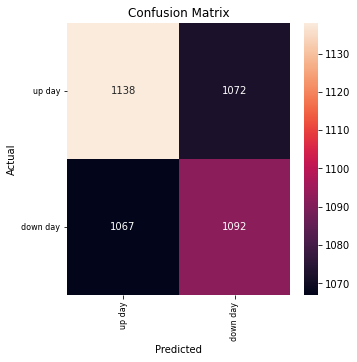

In [232]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

In [200]:
predicted

[-2.8431321318075105,
 -7.7057441518315395,
 2.6411352575836373,
 -7.2275939730782435,
 -10.751781360490757,
 1.5780925519899787,
 0.040337497558526614,
 3.6667441214100887,
 -5.9084522574945435,
 10.454886237612929,
 1.6420697141587035,
 -3.346034321929931,
 -3.0980129555296116,
 1.4093573742368037,
 -2.2686449566269467,
 -17.46063734454025,
 -7.0862325521996175,
 3.992718981023579,
 1.4492564448466174,
 -3.0320680629044636,
 -4.997983048288561,
 9.368373715726548,
 10.536149728869843,
 1.276603171651739,
 1.256918551398437,
 3.5998022593651573,
 7.6623180213075,
 1.4200851363951892,
 10.590596566822116,
 -8.158082950135832,
 -12.682941395336947,
 3.5446689626843786,
 -0.5601417556167987,
 -3.0244381327718632,
 -2.253974823501956,
 -1.883994884060194,
 -6.684937308517887,
 2.975254580679624,
 -7.536617183907774,
 -0.6432358440679359,
 -7.114484716755399,
 -2.3393807675270115,
 -2.546215953571011,
 -3.67565046202669,
 -8.15178905623931,
 -3.534703518427351,
 2.295802009532338,
 -2.8031

In [201]:
actual

[1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
